In [2]:
import pandas as pd
import os
import numpy as np
import datetime
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely as shp
import descartes
from shapely.geometry import Point, Polygon
import matplotlib.dates as mdates
%matplotlib inline
import datetime
import matplotlib.dates as mdates
import seaborn as sns
#import geoplot
#import descartes
#import geopandas as gpd
#from shapely.geometry import Point, Polygon
#%matplotlib inline

In [3]:
#uber2014=pd.read_csv("C:/Users/Rodrigo Bernal/Desktop/DS4A_workspace/Clase1/Dataset/Dataset/uber_trips_2014.csv")

In [3]:
uber2015=pd.read_csv("C:/Users/Rodrigo Bernal/Desktop/DS4A_workspace/Datathon/Dataset/Dataset/uber_trips_2015.csv")
uber2015.head()

,pickup_datetime,pickup_location_id,dispatch_base,affiliate_base
0,2015-05-17 09:47:00,141,B02617,B02617
1,2015-05-17 09:47:00,65,B02617,B02617
2,2015-05-17 09:47:00,100,B02617,B02617
3,2015-05-17 09:47:00,80,B02617,B02774
4,2015-05-17 09:47:00,90,B02617,B02617


In [4]:
url = 'https://www.dropbox.com/s/6s162261bj0i1za/geographic.csv?dl=1'
geographic=pd.read_csv(url)

In [6]:
def classify_lat_long(number):
    if number % 2 == 0:
        result = 'longitude'
    else:
        result = 'latitude'
    
    return result

def create_points_ids(test):
    id_point = []
    
    for i in range(len(test)):
        id_point.append(i)
        id_point.append(i)
    
    id_point = pd.Series(id_point)
        
    return id_point

def find_polygon_vertices_series(nta, nta_code):
    nta = pd.DataFrame(nta)
    nta = nta.dropna()
    long_lat = pd.Series(nta.index).apply(classify_lat_long)
    nta['long_lat'] = long_lat
    nta['id_points'] = create_points_ids(nta)
    result_df = nta.set_index('id_points').pivot(columns='long_lat')
    result_df['nta_code'] = nta_code
    result_df.columns = result_df.columns.droplevel(0)
    return result_df
    

def find_polygon_vertices_dataframe(geographic):
    columns_df = list(geographic.columns)
    
    result_df = pd.DataFrame()
    
    for i in columns_df:
        nta = geographic[i]
        result_intermediate_df = find_polygon_vertices_series(nta, i)
        #print(result_intermediate_df)
        result_df = pd.concat([result_df, result_intermediate_df], axis=0).dropna()
        
    #print(result_df.columns)
    result_df.columns = ['latitude', 'longitude', 'nta']
    return result_df   

def create_polygons(geographic):
    data = find_polygon_vertices_dataframe(geographic)
    data['points'] = data.loc[:, ['latitude', 'longitude']].apply(tuple, axis=1)
    nta_geo = data.groupby('nta')['points'].apply(list)
    nta_geo = pd.DataFrame(nta_geo)
    nta_geo['polygons'] = nta_geo['points'].apply(lambda row: Polygon(row))
    nta_geo = nta_geo.drop(columns=['points'])
    nta_geo.columns = ['geometry']
    nta_geo = gpd.GeoDataFrame(nta_geo)
    return nta_geo 

In [7]:
def classify_lat_long(number):
    if number % 2 == 0:
        result = 'longitude'
    else:
        result = 'latitude'
    
    return result

def create_points_ids(test):
    id_point = []
    
    for i in range(len(test)):
        id_point.append(i)
        id_point.append(i)
    
    id_point = pd.Series(id_point)
        
    return id_point

def find_polygon_vertices_series(nta, nta_code):
    nta = pd.DataFrame(nta)
    nta = nta.dropna()
    long_lat = pd.Series(nta.index).apply(classify_lat_long)
    nta['long_lat'] = long_lat
    nta['id_points'] = create_points_ids(nta)
    result_df = nta.set_index('id_points').pivot(columns='long_lat')
    result_df['nta_code'] = nta_code
    result_df.columns = result_df.columns.droplevel(0)
    return result_df
    

def find_polygon_vertices_dataframe(geographic):
    columns_df = list(geographic.columns)
    
    result_df = pd.DataFrame()
    
    for i in columns_df:
        nta = geographic[i]
        result_intermediate_df = find_polygon_vertices_series(nta, i)
        #print(result_intermediate_df)
        result_df = pd.concat([result_df, result_intermediate_df], axis=0).dropna()
        
    #print(result_df.columns)
    result_df.columns = ['latitude', 'longitude', 'nta']
    return result_df   

def create_polygons(geographic):
    data = find_polygon_vertices_dataframe(geographic)
    data['points'] = data.loc[:, ['latitude', 'longitude']].apply(tuple, axis=1)
    nta_geo = data.groupby('nta')['points'].apply(list)
    nta_geo = pd.DataFrame(nta_geo)
    nta_geo['polygons'] = nta_geo['points'].apply(lambda row: Polygon(row))
    nta_geo = nta_geo.drop(columns=['points'])
    nta_geo.columns = ['geometry']
    nta_geo = gpd.GeoDataFrame(nta_geo)
    return nta_geo nta_geo = create_polygons(geographic)

SyntaxError: invalid syntax (<ipython-input-7-fdc25c0a091e>, line 56)

In [ ]:
nta_geo = create_polygons(geographic)

In [ ]:
#pd.value_counts(uber2014["base"])
nta_geo.plot()

In [10]:
#uber2015=pd.read_csv("C:/Users/Rodrigo Bernal/Desktop/DS4A_workspace/Datathon/Dataset/Dataset/uber_trips_2015.csv")
uber2015["pickup_datetime"]=pd.to_datetime(uber2015["pickup_datetime"])
#uber2015['day'] = uber2015['pickup_datetime'].dt.day
#uber2015['month'] = uber2015['pickup_datetime'].dt.month
#uber2015["pickup_datetime_month"]=uber2015["pickup_datetime"].month
#uber2015['pickup_point'] = uber2015.loc[ : , ['pickup_latitude', 'pickup_longitude']].apply(tuple, axis=1)

In [11]:
zones=pd.read_csv("C:/Users/Rodrigo Bernal/Desktop/DS4A_workspace/Datathon/Dataset/Dataset/zones.csv")
zones.head()

,location_id,borough,zone,service_zone,nta_code
0,1,EWR,Newark Airport,EWR,NJ01
1,2,Queens,Jamaica Bay,Boro Zone,QN61
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone,BX31
3,4,Manhattan,Alphabet City,Yellow Zone,MN22
4,5,Staten Island,Arden Heights,Boro Zone,SI48


In [12]:
uber2015 = pd.merge(uber2015,zones, how='left' ,left_on=['pickup_location_id'],right_on=['location_id'], suffixes=('','_SPY'))

In [24]:
uber2015['day'] = uber2015['pickup_datetime'].dt.day
uber2015['month'] = uber2015['pickup_datetime'].dt.month
uber2015['day']=uber2015['day'].astype(str)
uber2015['month']=uber2015['month'].astype(str)
uber2015['date']=uber2015['month']+'-'+uber2015['day']+'-2015'
uber2015["date"]=pd.to_datetime(uber2015["date"])
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
uber2015['weekday']=uber2015["date"].dt.dayofweek
uber2015['daytype'] = np.where(uber2015['weekday']>=5, 'weekend', 'weekday')
#uber2015['weekday']=uber2015["date"].dt.dayofweek.map(dayOfWeek)
uber2015['hour']=uber2015["pickup_datetime"].dt.hour

In [ ]:
p1=Point(uber2015['pickup_point'])[0]
poly=nta_geo['geometry'][0]
poly.contains(point)

In [29]:
uber2015.head()

,pickup_datetime,pickup_location_id,dispatch_base,affiliate_base,location_id,borough,zone,service_zone,nta_code,day,month,date,weekday,hour,daytype
0,2015-05-17 09:47:00,141,B02617,B02617,141.0,Manhattan,Lenox Hill West,Yellow Zone,MN31,17,5,2015-05-17,6,9,weekend
1,2015-05-17 09:47:00,65,B02617,B02617,65.0,Brooklyn,Downtown Brooklyn/MetroTech,Boro Zone,BK38,17,5,2015-05-17,6,9,weekend
2,2015-05-17 09:47:00,100,B02617,B02617,100.0,Manhattan,Garment District,Yellow Zone,MN13,17,5,2015-05-17,6,9,weekend
3,2015-05-17 09:47:00,80,B02617,B02774,80.0,Brooklyn,East Williamsburg,Boro Zone,BK90,17,5,2015-05-17,6,9,weekend
4,2015-05-17 09:47:00,90,B02617,B02617,90.0,Manhattan,Flatiron,Yellow Zone,MN13,17,5,2015-05-17,6,9,weekend


In [14]:
trips_by_daymonth=pd.DataFrame(uber2015.groupby(['date']).size(), columns=['number_of_trips'])
trips_by_daymonth.reset_index(inplace=True)
trips_by_daymonth.head()
#trips_by_daymonth.columns#='number_of_trips'

,date,number_of_trips
0,2015-01-01,58045
1,2015-01-02,40287
2,2015-01-03,59844
3,2015-01-04,41943
4,2015-01-05,43678


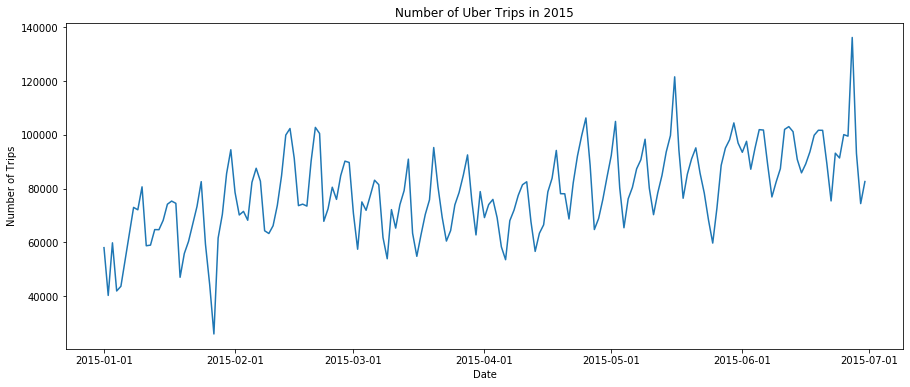

In [15]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
# Enhanced line plot for energy consumption over time
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(trips_by_daymonth['date'], trips_by_daymonth['number_of_trips'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # format x-axis display
plt.title('Number of Uber Trips in 2015')
plt.xlabel('Date');
plt.ylabel('Number of Trips');


In [27]:
#Agrupaciones por date-service_zone, date-borough, borough-weekday
trips_by_servicezone=pd.DataFrame(uber2015.groupby(['date','service_zone']).size(), columns=['number_of_trips'])
trips_by_servicezone.reset_index(inplace=True)
trips_by_borough=pd.DataFrame(uber2015.groupby(['date','borough']).size(), columns=['number_of_trips'])
trips_by_borough.reset_index(inplace=True)
trips_by_weekday=pd.DataFrame(uber2015.groupby(['borough','weekday']).size(), columns=['number_of_trips'])
trips_by_weekday.reset_index(inplace=True)
trips_by_hourweekday=pd.DataFrame(uber2015.groupby(['hour','weekday']).size(), columns=['number_of_trips'])
trips_by_hourweekday.reset_index(inplace=True)
trips_by_hourborough=pd.DataFrame(uber2015.groupby(['hour','borough']).size(), columns=['number_of_trips'])
trips_by_hourborough.reset_index(inplace=True)
trips_by_typedayborough=pd.DataFrame(uber2015.groupby(['daytype','borough']).size(), columns=['number_of_trips'])
trips_by_typedayborough.reset_index(inplace=True)

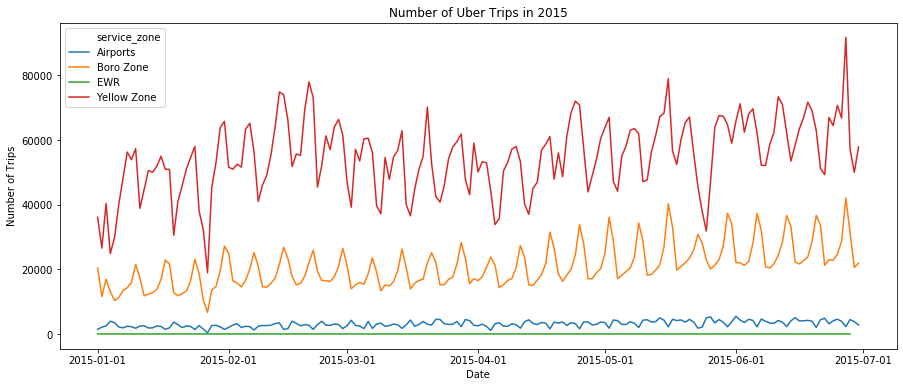

In [17]:
register_matplotlib_converters()
# Enhanced line plot for energy consumption over time
fig, ax = plt.subplots(figsize=(15,6))
sns.lineplot(x='date', y='number_of_trips',data=trips_by_servicezone,hue='service_zone')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # format x-axis display
plt.title('Number of Uber Trips in 2015')
plt.xlabel('Date');
plt.ylabel('Number of Trips');

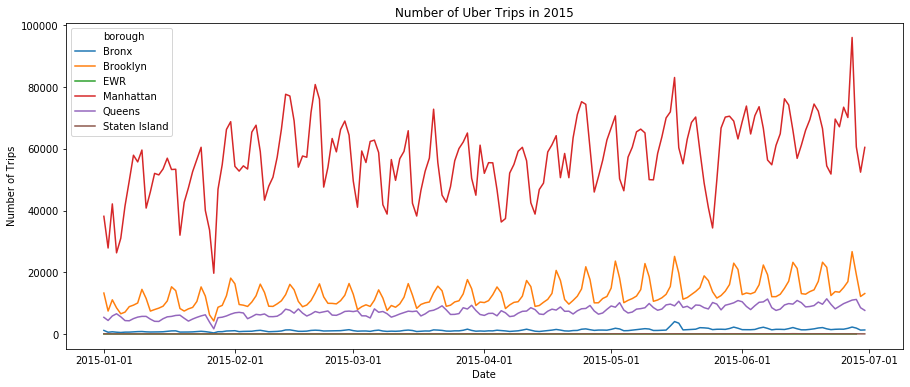

In [18]:
register_matplotlib_converters()
# Enhanced line plot for energy consumption over time
fig, ax = plt.subplots(figsize=(15,6))
sns.lineplot(x='date', y='number_of_trips',data=trips_by_borough,hue='borough')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # format x-axis display
plt.title('Number of Uber Trips in 2015')
plt.xlabel('Date');
plt.ylabel('Number of Trips');

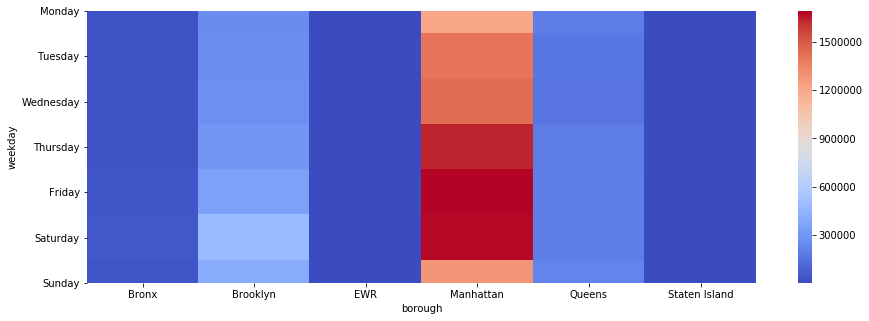

In [20]:
y_axis_labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
pivot_df = trips_by_weekday.pivot('weekday','borough','number_of_trips')
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(pivot_df, cmap="coolwarm", ax=ax,yticklabels=y_axis_labels);
#ax.set_title('PEC Electric Power Sector');

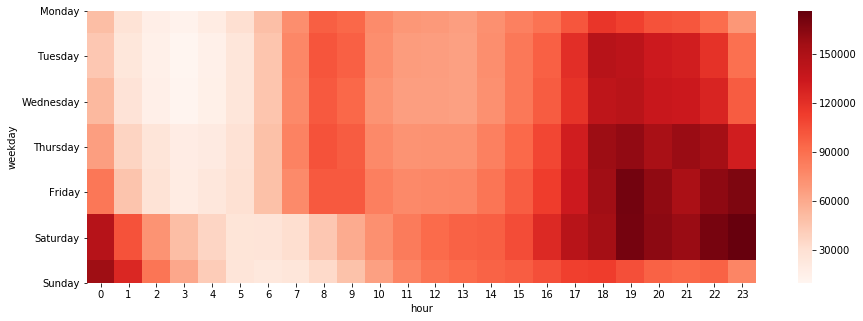

In [21]:
y_axis_labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
pivot_df = trips_by_hourweekday.pivot('weekday','hour','number_of_trips')
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(pivot_df, cmap="Reds", ax=ax,yticklabels=y_axis_labels);
#ax.set_title('PEC Electric Power Sector');

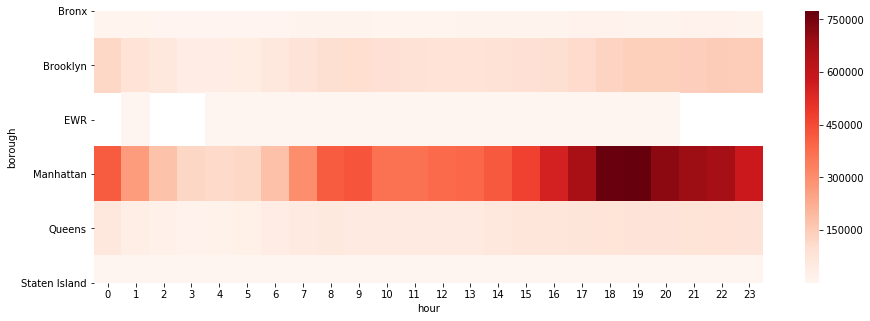

In [22]:
y_axis_labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
pivot_df = trips_by_hourborough.pivot('borough','hour','number_of_trips')
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(pivot_df, cmap="Reds", ax=ax);
plt.yticks(rotation=0);
#ax.set_title('PEC Electric Power Sector');

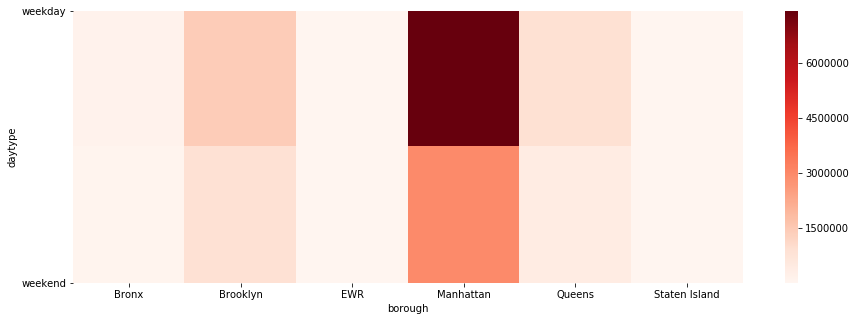

In [28]:
pivot_df = trips_by_typedayborough.pivot('daytype','borough','number_of_trips')
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(pivot_df, cmap="Reds", ax=ax);
plt.yticks(rotation=0);
#ax.set_title('PEC Electric Power Sector');

In [31]:
uber2015manhattan=uber2015[uber2015['borough']=='Manhattan']

(10371060, 15)

In [51]:
MANtrips_by_servicezone=pd.DataFrame(uber2015manhattan.groupby(['date','service_zone']).size(), columns=['number_of_trips'])
MANtrips_by_servicezone.reset_index(inplace=True)
MANtrips_by_zone=pd.DataFrame(uber2015manhattan.groupby(['date','zone']).size(), columns=['number_of_trips'])
MANtrips_by_zone.reset_index(inplace=True)
MANtrips_by_hourweekday=pd.DataFrame(uber2015manhattan.groupby(['hour','weekday']).size(), columns=['number_of_trips'])
MANtrips_by_hourweekday.reset_index(inplace=True)
MANtrips_by_hourzone=pd.DataFrame(uber2015manhattan.groupby(['hour','zone']).size(), columns=['number_of_trips'])
MANtrips_by_hourzone.reset_index(inplace=True)
MANtrips_by_dayzone=pd.DataFrame(uber2015manhattan.groupby(['weekday','zone']).size(), columns=['number_of_trips'])
MANtrips_by_dayzone.reset_index(inplace=True)

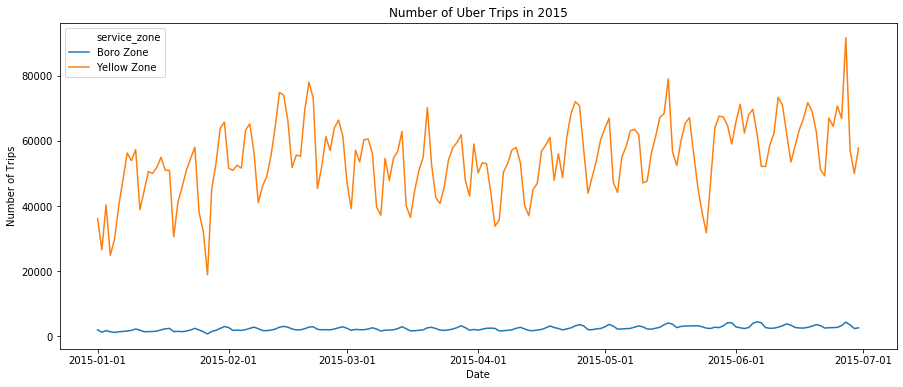

In [33]:
register_matplotlib_converters()
# Enhanced line plot for energy consumption over time
fig, ax = plt.subplots(figsize=(15,6))
sns.lineplot(x='date', y='number_of_trips',data=MANtrips_by_servicezone,hue='service_zone')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # format x-axis display
plt.title('Number of Uber Trips in 2015')
plt.xlabel('Date');
plt.ylabel('Number of Trips');

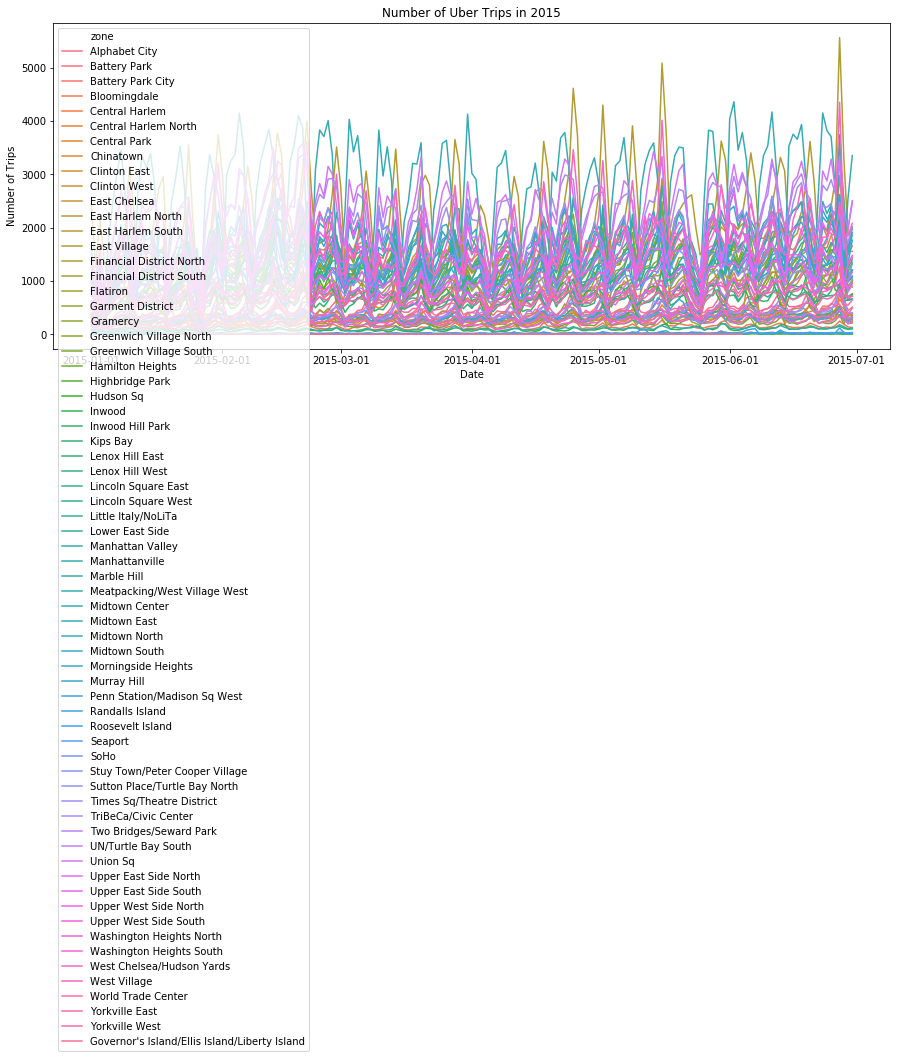

In [36]:
register_matplotlib_converters()
# Enhanced line plot for energy consumption over time
fig, ax = plt.subplots(figsize=(15,6))
sns.lineplot(x='date', y='number_of_trips',data=MANtrips_by_zone,hue='zone')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # format x-axis display
plt.title('Number of Uber Trips in 2015')
plt.xlabel('Date');
plt.ylabel('Number of Trips');

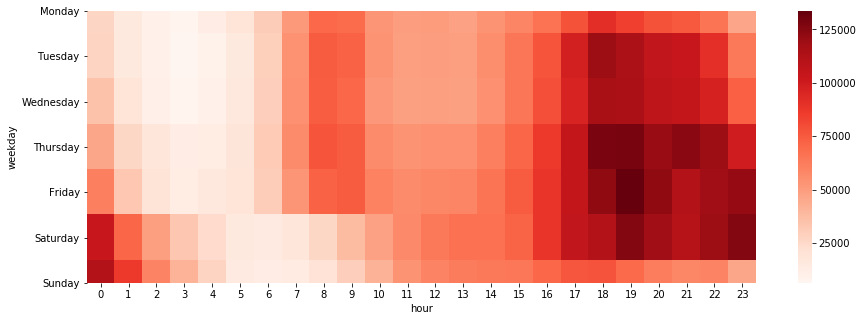

In [38]:
y_axis_labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
pivot_df = MANtrips_by_hourweekday.pivot('weekday','hour','number_of_trips')
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(pivot_df, cmap="Reds", ax=ax,yticklabels=y_axis_labels);
#ax.set_title('PEC Electric Power Sector');

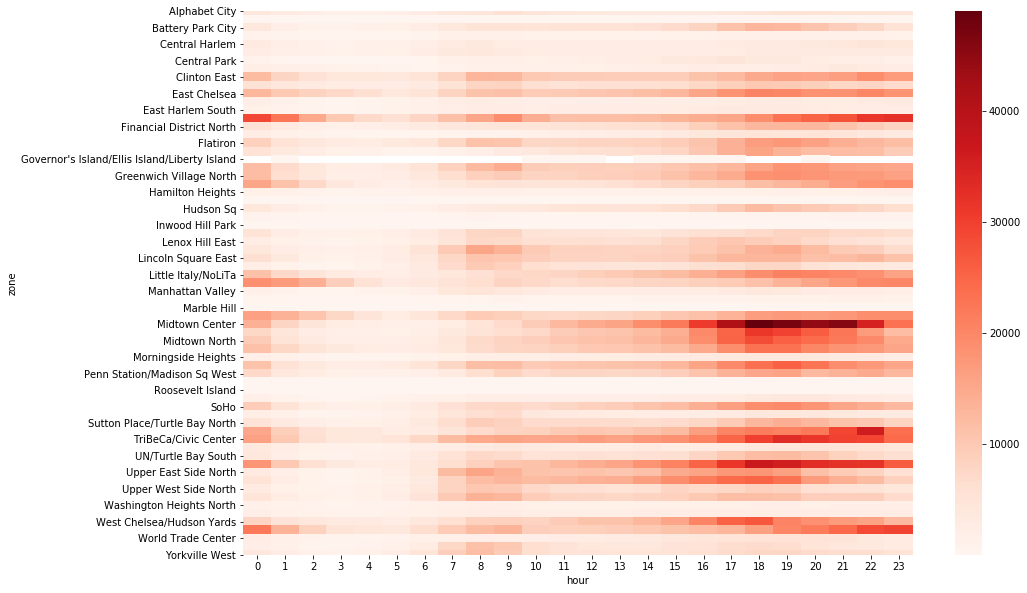

In [47]:
pivot_df = MANtrips_by_hourzone.pivot('zone','hour','number_of_trips')
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(pivot_df, cmap="Reds", ax=ax);
#ax.set_title('PEC Electric Power Sector');

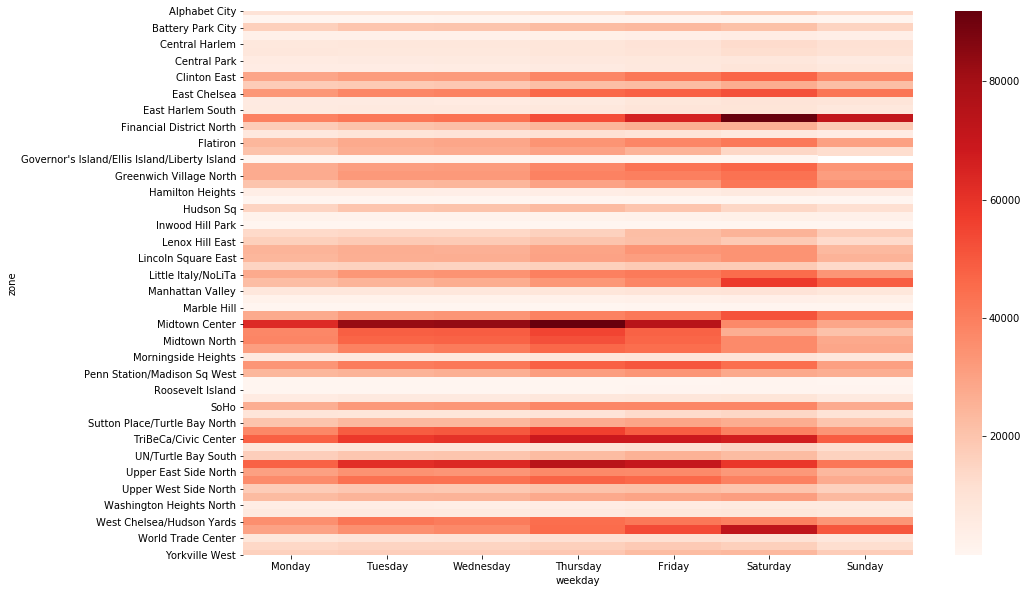

In [58]:
x_axis_labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
pivot_df = MANtrips_by_dayzone.pivot('zone','weekday','number_of_trips')
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(pivot_df, cmap="Reds", ax=ax,xticklabels=x_axis_labels);

In [ ]:
coordinates={} 
for i in geographic.columns:
    coordinates[i]=[]
coordinates

for i in np.arange(0,len(geographic),2):
    for nta in geographic.columns:
        coordinates[nta]=coordinates[nta]+[(geographic.iloc[i].loc[nta],geographic.iloc[i+1].loc[nta])]

In [ ]:
geopoints=gpd.GeoDataFrame(columns=['geometry','nta_code'])
for i in coordinates:
    geopoints.loc[i]=shp.geometry.Polygon(tuple(coordinates[i]))

geopoints['nta_code']=geopoints.index

In [ ]:
gpd.